In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/updated-resume-dataset/UpdatedResumeDataSet.csv


![](https://d3kqdc25i4tl0t.cloudfront.net/articles/content/_340594_resumeanatomy.hero.jpg)

In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
data = pd.read_csv("../input/updated-resume-dataset/UpdatedResumeDataSet.csv")

In [4]:
#print top 5 rows of dataset.
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
# Print the last 5 rows.
data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [6]:
# total size of dataset.
data.size

1924

In [7]:
#Dataset has 962 rows with 2 columns.
data.shape

(962, 2)

In [8]:
#Information about columns of dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [9]:
#Check for null values.
data.isnull().sum()

Category    0
Resume      0
dtype: int64

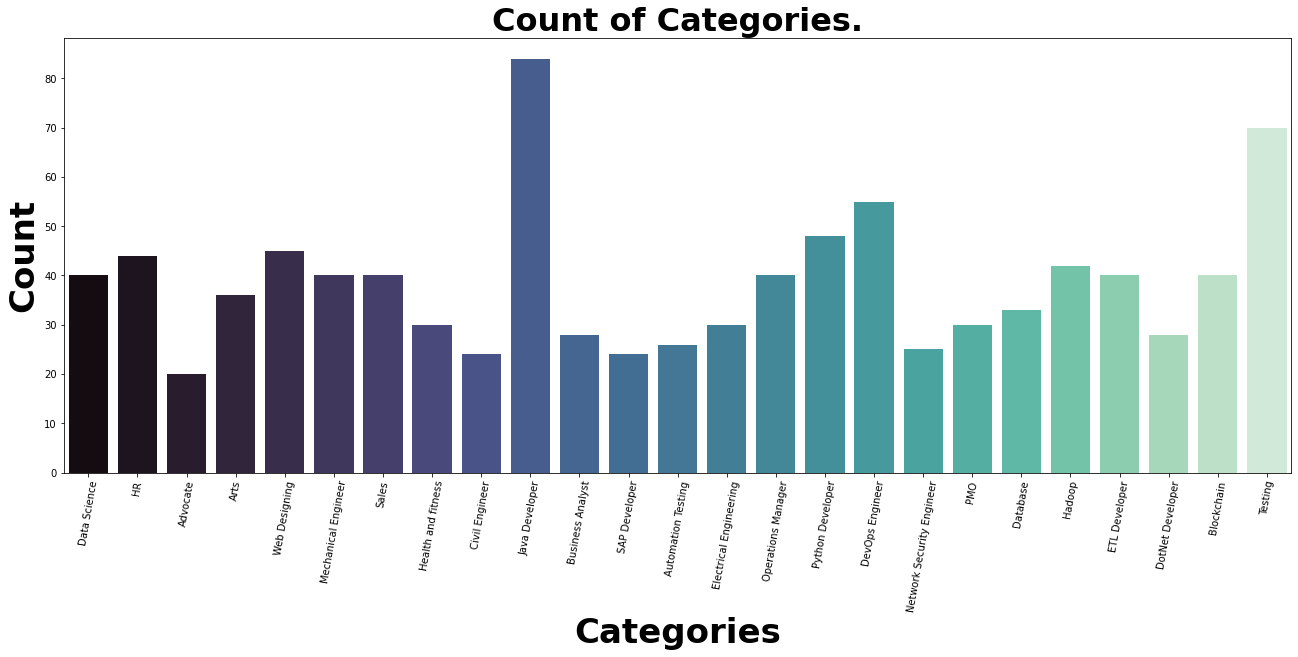

In [10]:
# Create count plot for categoris columns.

plt.figure(figsize=(22,8))
ax = sns.countplot(x = 'Category', data= data,palette = 'mako')
ax.set_title("Count of Categories.",fontweight = 'bold',size=32)
plt.xticks(rotation=80)
ax.set_ylabel('Count',fontweight='bold',size=34)
ax.set_xlabel("Categories",fontweight = 'bold',size=34)
plt.show()

# Most common words

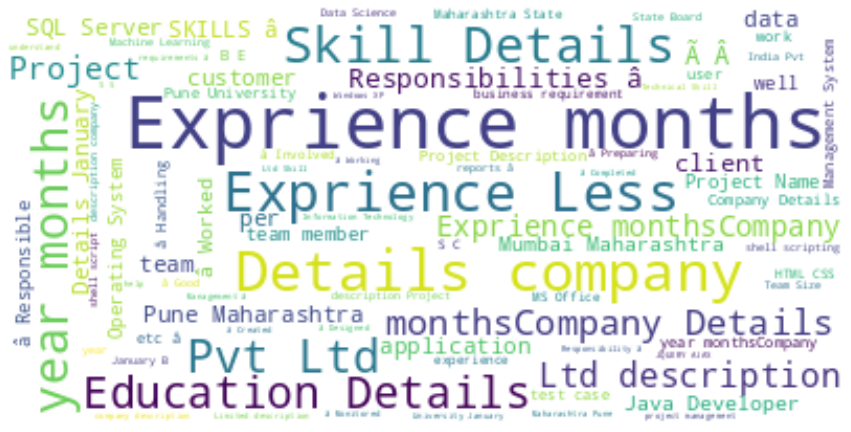

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.Resume)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cleaning the Resume texts

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Resume'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus[1]

'educ detail may may b e uit rgpv data scientist data scientist matelab skill detail python exprienc less year month statsmodel exprienc month aw exprienc less year month machin learn exprienc less year month sklearn exprienc less year month scipi exprienc less year month kera exprienc less year monthscompani detail compani matelab descript ml platform busi profession dummi enthusiast koramangala th block achiev task behind sukh sagar bengaluru india develop deploy auto preprocess step machin learn mainli miss valu treatment outlier detect encod scale featur select dimension reduct deploy autom classif regress model linkedin com aditya rathor b b reasearch deploy time seri forecast model arima sarimax holt winter prophet work meta featur extract problem github com rathorolog implement state art research paper outlier detect mix attribut compani matelab descript'

# Creating the Bag of Words model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data['Category'].values

# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the Naive Bayes model on the Training set

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [19]:
print(acc)

0.9948186528497409


# Creating the TF - IDF Vectorizer model

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [21]:
y=data['Category'].values

# Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(721, 5000)
(241, 5000)
(721,)
(241,)


In [24]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names())

In [25]:
count_df.head()

,ab,abacu,abacu electron,abacu electron pvt,abap,abil,abil learn,abil work,abl,abl work,...,year monthscompani,year monthscompani detail,year project,year work,york,yr,zaggl,zaggl prepaid,zaggl prepaid ocean,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016555,0.016555,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015039,0.015039,0.0,0.0,0.0,0.027595,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)

GaussianNB()

In [27]:
y1_pred = classifier.predict(X1_test)

In [28]:
cm = confusion_matrix(y1_test, y1_pred)
acc1 = accuracy_score(y1_test, y1_pred)

In [29]:
print(acc1)

0.995850622406639


# MultinomialNB Algorithm

In [30]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [31]:
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
score = accuracy_score(y1_test, pred)
score

0.9543568464730291

# Multinomial Classifier with Hyperparameter

In [32]:
classifier=MultinomialNB(alpha=0.1)

In [33]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X1_train,y1_train)
    y_pred=sub_classifier.predict(X1_test)
    score = accuracy_score(y1_test, pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9543568464730291
Alpha: 0.1, Score : 0.9543568464730291
Alpha: 0.2, Score : 0.9543568464730291
Alpha: 0.30000000000000004, Score : 0.9543568464730291
Alpha: 0.4, Score : 0.9543568464730291
Alpha: 0.5, Score : 0.9543568464730291
Alpha: 0.6000000000000001, Score : 0.9543568464730291
Alpha: 0.7000000000000001, Score : 0.9543568464730291
Alpha: 0.8, Score : 0.9543568464730291
Alpha: 0.9, Score : 0.9543568464730291


# Create visualization for all model with their Accuracy

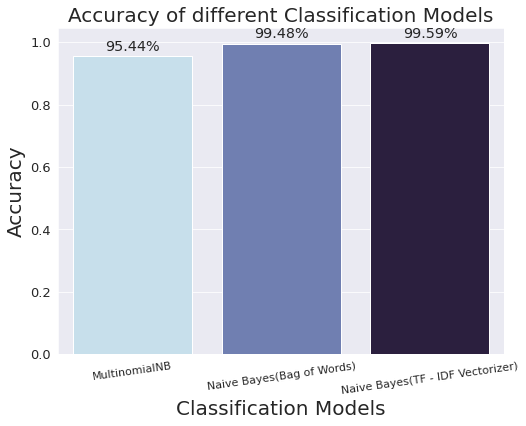

In [34]:
mylist=[]
mylist2=[]
mylist.append(score)
mylist2.append("MultinomialNB")
mylist.append(acc)
mylist2.append("Naive Bayes(Bag of Words)")
mylist.append(acc1)
mylist2.append("Naive Bayes(TF - IDF Vectorizer)")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "ch:s=.25,rot=-.25", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

![](https://media.istockphoto.com/illustrations/thank-you-translation-illustration-id1275501527?k=20&m=1275501527&s=612x612&w=0&h=urN5Ns8Xk1-Ywg97zjOuSv-L9Q5SQdSRnVwap0ZKTq0=)